In [111]:
# !pip install azure-ai-ml

In [1]:
#!pip install mltable

In [76]:
rai_diabetes_example_version_string = "1"
compute_name = "rai-cluster"

input_train_data = "diabetes_train"
input_test_data = "diabetes_test"

## Upload data as MLTable for RAI

In [77]:
import mltable
from mltable import MLTableHeaders, MLTableFileEncoding, DataType
from azure.ai.ml import MLClient
from azure.ai.ml.entities import Data
from azure.ai.ml.constants import AssetTypes
from azure.identity import DefaultAzureCredential
import os
import pandas as pd


In [78]:
# Enter details of your AML workspace
subscription_id = ""
resource_group = ""
workspace = ""

# Handle to the workspace
from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

credential = DefaultAzureCredential()
ml_client = MLClient(
    credential=credential,
    subscription_id=subscription_id,
    resource_group_name=resource_group,
    workspace_name=workspace,
)
print(ml_client)


MLClient(credential=<azure.identity._credentials.default.DefaultAzureCredential object at 0x7f038e1068c0>,
         subscription_id=e298b7a2-89dd-4fc6-9d88-e65d5d2aaad1,
         resource_group_name=osi-rg,
         workspace_name=aml-ws)


In [79]:
# Get handle to azureml registry for the RAI built in components
registry_name = "azureml"
ml_client_registry = MLClient(
    credential=credential,
    subscription_id=subscription_id,
    resource_group_name=resource_group,
    registry_name=registry_name,
)
print(ml_client_registry)

MLClient(credential=<azure.identity._credentials.default.DefaultAzureCredential object at 0x7f038e1068c0>,
         subscription_id=6c6683e9-e5fe-4038-8519-ce6ebec2ba15,
         resource_group_name=registry-builtin-prod-eastus-01,
         workspace_name=None)


In [80]:
train_data_path = "./diabetes_train"
test_data_path = "./diabetes_test"

In [81]:
#Load some data for a quick view:
# path_to_train_csv_file = [{"file": "./diabetes_prediction_dataset_train.csv"}]

# train_tbl = mltable.from_delimited_files(
#     paths=path_to_train_csv_file,
#     delimiter=",",
#     header=MLTableHeaders.all_files_same_headers,
#     infer_column_types=True,
#     include_path_column=False,
#     encoding=MLTableFileEncoding.utf8,
# )



# train_tbl.save(train_data_path)

TrainingData = Data(
    path= train_data_path,
    type=AssetTypes.MLTABLE,
    description="Example Diabetes train dataset",
    name=input_train_data,
    version=rai_diabetes_example_version_string,
)

ml_client.data.create_or_update(TrainingData)



Data({'skip_validation': False, 'mltable_schema_url': None, 'referenced_uris': ['./diabetes_prediction_dataset_train.csv'], 'type': 'mltable', 'is_anonymous': False, 'auto_increment_version': False, 'name': 'diabetes_train', 'description': 'Example Diabetes train dataset', 'tags': {}, 'properties': {}, 'id': '/subscriptions/e298b7a2-89dd-4fc6-9d88-e65d5d2aaad1/resourceGroups/osi-rg/providers/Microsoft.MachineLearningServices/workspaces/aml-ws/data/diabetes_train/versions/28', 'Resource__source_path': None, 'base_path': '/mnt/batch/tasks/shared/LS_root/mounts/clusters/sifakhra1/code/Users/sifakhra', 'creation_context': <azure.ai.ml.entities._system_data.SystemData object at 0x7f038e70dc00>, 'serialize': <msrest.serialization.Serializer object at 0x7f038e70caf0>, 'version': '28', 'latest_version': None, 'path': 'azureml://subscriptions/e298b7a2-89dd-4fc6-9d88-e65d5d2aaad1/resourcegroups/osi-rg/workspaces/aml-ws/datastores/workspaceblobstore/paths/LocalUpload/31bd52e0b360647d8a011ec49c883

In [82]:
train_tbl = mltable.load(train_data_path)
train_df = train_tbl.to_pandas_dataframe()

# show the first few rows of the dataframe
train_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078,144.0
1,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633,150.0
2,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,280.0
3,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483,125.0
4,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,59.0


In [83]:
#Test Data
path_to_test_csv_file = [{"file": "./diabetes_prediction_dataset_test.csv"}]

# test_tbl = mltable.from_delimited_files(
#     paths=path_to_test_csv_file,
#     delimiter=",",
#     header=MLTableHeaders.all_files_same_headers,
#     infer_column_types=True,
#     include_path_column=False,
#     encoding=MLTableFileEncoding.utf8,
# )

# test_tbl.save(test_data_path)

TestData = Data(
    path=test_data_path,
    type=AssetTypes.MLTABLE,
    description="Example Diabetes test dataset",
    name=input_test_data,
    version=rai_diabetes_example_version_string,
)

ml_client.data.create_or_update(TestData)

Data({'skip_validation': False, 'mltable_schema_url': None, 'referenced_uris': ['./diabetes_prediction_dataset_test.csv'], 'type': 'mltable', 'is_anonymous': False, 'auto_increment_version': False, 'name': 'diabetes_test', 'description': 'Example Diabetes test dataset', 'tags': {}, 'properties': {}, 'id': '/subscriptions/e298b7a2-89dd-4fc6-9d88-e65d5d2aaad1/resourceGroups/osi-rg/providers/Microsoft.MachineLearningServices/workspaces/aml-ws/data/diabetes_test/versions/28', 'Resource__source_path': None, 'base_path': '/mnt/batch/tasks/shared/LS_root/mounts/clusters/sifakhra1/code/Users/sifakhra', 'creation_context': <azure.ai.ml.entities._system_data.SystemData object at 0x7f038e7071c0>, 'serialize': <msrest.serialization.Serializer object at 0x7f038e707700>, 'version': '28', 'latest_version': None, 'path': 'azureml://subscriptions/e298b7a2-89dd-4fc6-9d88-e65d5d2aaad1/resourcegroups/osi-rg/workspaces/aml-ws/datastores/workspaceblobstore/paths/LocalUpload/fc8be489b04fce654b42bb6b43a7ca65/

In [84]:
test_tbl = mltable.load(test_data_path)
test_df = test_tbl.to_pandas_dataframe()

# show the first few rows of the dataframe
test_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.045341,-0.044642,-0.006206,-0.015999,0.125019,0.125198,0.019187,0.034309,0.032432,-0.005220,219.0
1,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,70.0
2,0.063504,0.050680,-0.004050,-0.012556,0.103003,0.048790,0.056003,-0.002592,0.084492,-0.017646,202.0
3,0.096197,-0.044642,0.051996,0.079265,0.054845,0.036577,-0.076536,0.141322,0.098648,0.061054,230.0
4,0.012648,0.050680,-0.020218,-0.002228,0.038334,0.053174,-0.006584,0.034309,-0.005142,-0.009362,111.0


In [85]:
target_column_name = "target"

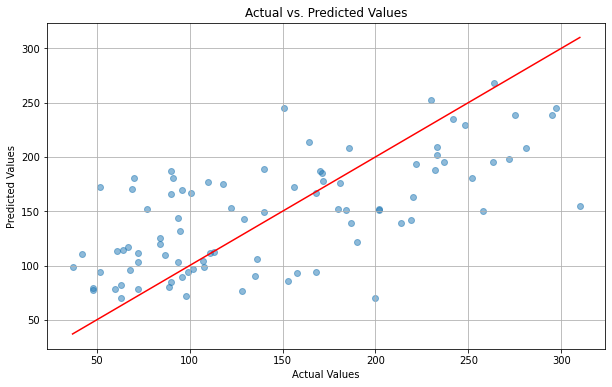

In [86]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt



# Split the data into features and target
X_train = train_df.drop(columns=['target'])
y_train = train_df['target']

X_test = test_df.drop(columns=['target'])
y_test = test_df['target']

# Train the RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Plotting actuals vs predictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for perfect prediction
plt.grid(True)

# Save the plot
plt.savefig('actual_vs_predicted.png')
plt.show()




# Creating the Model

To simplify the model creation process, we're going to use a pipeline.

We create a directory for the training script:

In [87]:
import os

os.makedirs("register_model_src", exist_ok=True)
os.makedirs("diabetes_component_src", exist_ok=True)

Next, we write out our training script:

In [88]:
%%writefile diabetes_component_src/training_script_reg.py
# Necessary Imports

import mltable
import pandas as pd
import argparse
import shap
import sklearn
import pandas as pd
import logging
import mlflow
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
# import matplotlib.pyplot as plt
from azureml.core import Run
import argparse
import os
import shutil
import tempfile
def parse_args():
    # setup arg parser
    parser = argparse.ArgumentParser()

    # add arguments
    parser.add_argument("--training_data", type=str, help="Path to training data")
    parser.add_argument("--target_column_name", type=str, help="Name of target column")
    parser.add_argument("--model_output", type=str, help="Path of output model")
    parser.add_argument("--test_data", type=str, help="Path to test data")
    # parse args
    args = parser.parse_args()

    # return args
    return args


def main(args):
    current_experiment = Run.get_context().experiment
    tracking_uri = current_experiment.workspace.get_mlflow_tracking_uri()
    print("tracking_uri: {0}".format(tracking_uri))
    mlflow.set_tracking_uri(tracking_uri)
    mlflow.set_experiment(current_experiment.name)
    mlflow.autolog()
    
    train_tbl = mltable.load(args.training_data)
    train_df = train_tbl.to_pandas_dataframe()
    
    test_tbl = mltable.load(args.test_data)
    test_df = test_tbl.to_pandas_dataframe()
    
    # Split the data into features and target
    X_train = train_df.drop(columns=['target'])
    y_train = train_df['target']

    X_test = test_df.drop(columns=['target'])
    y_test = test_df['target']

    # Train the RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)

    # Predict using the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error on Test Data: {mse}")
    mlflow.log_metric('mse', mse)
    
    
    # Plotting actuals vs predictions
#     plt.figure(figsize=(10, 6))
#     plt.scatter(y_test, y_pred, alpha=0.5)
#     plt.xlabel('Actual Values')
#     plt.ylabel('Predicted Values')
#     plt.title('Actual vs. Predicted Values')
#     plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line for perfect prediction
#     plt.grid(True)

    # Save the plot
#     plt.savefig('actual_vs_predicted.png')
#     mlflow.log_artifact("actual_vs_predicted.png") 
    #plt.show()
  
    
    
    

    # Saving model with mlflow - leave this section unchanged
    with tempfile.TemporaryDirectory() as td:
        print("Saving model with MLFlow to temporary directory")
        tmp_output_dir = os.path.join(td, "my_model_dir")
        mlflow.sklearn.save_model(sk_model=model, path=tmp_output_dir)

        print("Copying MLFlow model to output path")
        for file_name in os.listdir(tmp_output_dir):
            print("  Copying: ", file_name)
            # As of Python 3.8, copytree will acquire dirs_exist_ok as
            # an option, removing the need for listdir
            shutil.copy2(src=os.path.join(tmp_output_dir, file_name), dst=os.path.join(args.model_output, file_name))


# run script
if __name__ == "__main__":
    # add space in logs
    print("*" * 60)
    print("\n\n")

    # parse args
    args = parse_args()

    # run main function
    main(args)

    # add space in logs
    print("*" * 60)
    print("\n\n")

Overwriting diabetes_component_src/training_script_reg.py


In [89]:
%%writefile register_model_src/register.py

# ---------------------------------------------------------
# Copyright (c) Microsoft Corporation. All rights reserved.
# ---------------------------------------------------------

import argparse
import json
import os
import time


from azureml.core import Run

import mlflow
import mlflow.sklearn

# Based on example:
# https://docs.microsoft.com/en-us/azure/machine-learning/how-to-train-cli
# which references
# https://github.com/Azure/azureml-examples/tree/main/cli/jobs/train/lightgbm/iris


def parse_args():
    # setup arg parser
    parser = argparse.ArgumentParser()

    # add arguments
    parser.add_argument("--model_input_path", type=str, help="Path to input model")
    parser.add_argument(
        "--model_info_output_path", type=str, help="Path to write model info JSON"
    )
    parser.add_argument(
        "--model_base_name", type=str, help="Name of the registered model"
    )
    parser.add_argument(
        "--model_name_suffix", type=int, help="Set negative to use epoch_secs"
    )

    # parse args
    args = parser.parse_args()

    # return args
    return args


def main(args):
    current_experiment = Run.get_context().experiment
    tracking_uri = current_experiment.workspace.get_mlflow_tracking_uri()
    print("tracking_uri: {0}".format(tracking_uri))
    mlflow.set_tracking_uri(tracking_uri)
    mlflow.set_experiment(current_experiment.name)

    print("Loading model")
    mlflow_model = mlflow.sklearn.load_model(args.model_input_path)

    if args.model_name_suffix < 0:
        suffix = int(time.time())
    else:
        suffix = args.model_name_suffix
    registered_name = "{0}_{1}".format(args.model_base_name, suffix)
    print(f"Registering model as {registered_name}")

    print("Registering via MLFlow")
    mlflow.sklearn.log_model(
        sk_model=mlflow_model,
        registered_model_name=registered_name,
        artifact_path=registered_name,
    )

    print("Writing JSON")
    dict = {"id": "{0}:1".format(registered_name)}
    output_path = os.path.join(args.model_info_output_path, "model_info.json")
    with open(output_path, "w") as of:
        json.dump(dict, fp=of)


# run script
if __name__ == "__main__":
    # add space in logs
    print("*" * 60)
    print("\n\n")

    # parse args
    args = parse_args()

    # run main function
    main(args)

    # add space in logs
    print("*" * 60)
    print("\n\n")

Overwriting register_model_src/register.py


Now, we can build this into an AzureML component:

In [90]:
from azure.ai.ml import load_component

yaml_contents = f"""
$schema: http://azureml/sdk-2-0/CommandComponent.json
name: rai_diabetes_training_component
display_name: Diabetes training component for RAI example
version: {rai_diabetes_example_version_string}
type: command
inputs:
  training_data:
    type: path
  test_data:
    type: path
  target_column_name:
    type: string
outputs:
  model_output:
    type: path
code: ./diabetes_component_src/
environment: azureml://registries/azureml/environments/AzureML-responsibleai-0.20-ubuntu20.04-py38-cpu/versions/4
command: >-
  python training_script_reg.py
  --training_data ${{{{inputs.training_data}}}}
  --test_data ${{{{inputs.test_data}}}}
  --target_column_name ${{{{inputs.target_column_name}}}}
  --model_output ${{{{outputs.model_output}}}}
"""

yaml_filename = "DiabetesRegTrainingComp.yaml"

with open(yaml_filename, "w") as f:
    f.write(yaml_contents)

train_model_component = load_component(source=yaml_filename)

In [91]:
yaml_contents = f"""
$schema: http://azureml/sdk-2-0/CommandComponent.json
name: register_model
display_name: Register Model
version: {rai_diabetes_example_version_string}
type: command
is_deterministic: False
inputs:
  model_input_path:
    type: path
  model_base_name:
    type: string
  model_name_suffix: # Set negative to use epoch_secs
    type: integer
    default: -1
outputs:
  model_info_output_path:
    type: path
code: ./register_model_src/
environment: azureml://registries/azureml/environments/AzureML-responsibleai-0.20-ubuntu20.04-py38-cpu/versions/4
command: >-
  python register.py
  --model_input_path ${{{{inputs.model_input_path}}}}
  --model_base_name ${{{{inputs.model_base_name}}}}
  --model_name_suffix ${{{{inputs.model_name_suffix}}}}
  --model_info_output_path ${{{{outputs.model_info_output_path}}}}

"""

yaml_filename = "register.yaml"

with open(yaml_filename, "w") as f:
    f.write(yaml_contents)

register_component = load_component(source=yaml_filename)

We need a compute target on which to run our jobs. The following checks whether the compute specified above is present; if not, then the compute target is created.

In [92]:
from azure.ai.ml.entities import AmlCompute

all_compute_names = [x.name for x in ml_client.compute.list()]

if compute_name in all_compute_names:
    print(f"Found existing compute: {compute_name}")
else:
    my_compute = AmlCompute(
        name=compute_name,
        size="Standard_D2_v2",
        min_instances=0,
        max_instances=4,
        idle_time_before_scale_down=3600,
    )
    ml_client.compute.begin_create_or_update(my_compute).result()
    print("Initiated compute creation")

Found existing compute: rai-cluster


## Running a training pipeline

Now that we have our training component, we can run it. We begin by generating a unique name for the mode;

In [93]:
import time

model_name_suffix = int(time.time())
model_name = "rai_diabetes_example_reg"

Next, we define our training pipeline. This has two components. The first is the training component which we defined above. The second is a component to register the model in AzureML:

In [94]:
from azure.ai.ml import dsl, Input

diabetes_train_mltable = Input(
    type="mltable",
    path=f"azureml:{input_train_data}:{rai_diabetes_example_version_string}",
    mode="download",
)
diabetes_test_mltable = Input(
    type="mltable",
    path=f"azureml:{input_test_data}:{rai_diabetes_example_version_string}",
    mode="download",
)


@dsl.pipeline(
    compute=compute_name,
    description="Register Model for RAI Diabetes example",
    experiment_name=f"RAI_Diabetes_Example_Model_Training_{model_name_suffix}",
)
def my_training_pipeline(target_column_name, training_data,test_data):
    trained_model = train_model_component(
        target_column_name=target_column_name, training_data=training_data, test_data=test_data
    )
    trained_model.set_limits(timeout=120)

    _ = register_component(
        model_input_path=trained_model.outputs.model_output,
        model_base_name=model_name,
        model_name_suffix=model_name_suffix,
    )

    return {}


model_registration_pipeline_job = my_training_pipeline(
    target_column_name, diabetes_train_mltable, diabetes_test_mltable
)

With the training pipeline defined, we can submit it for execution in AzureML. We define a helper function to wait for the job to complete:

In [95]:
from azure.ai.ml.entities import PipelineJob
from IPython.core.display import HTML
from IPython.display import display


def submit_and_wait(ml_client, pipeline_job) -> PipelineJob:
    created_job = ml_client.jobs.create_or_update(pipeline_job)
    assert created_job is not None

    print("Pipeline job can be accessed in the following URL:")
    display(HTML('<a href="{0}">{0}</a>'.format(created_job.studio_url)))

    while created_job.status not in [
        "Completed",
        "Failed",
        "Canceled",
        "NotResponding",
    ]:
        time.sleep(30)
        created_job = ml_client.jobs.get(created_job.name)
        print("Latest status : {0}".format(created_job.status))
    assert created_job.status == "Completed"
    return created_job


# This is the actual submission
training_job = submit_and_wait(ml_client, model_registration_pipeline_job)

Uploading diabetes_component_src (0.0 MBs): 100%|██████████| 3462/3462 [00:00<00:00, 102318.12it/s]




Pipeline job can be accessed in the following URL:


Latest status : Running
Latest status : Running
Latest status : Completed
